<a href="https://colab.research.google.com/github/Mortaza-Seydi/Backpropagation/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morteza Seydi
## Backpropagation Algorithm Implementation Python 

### Imports:


*   numpy : for matrix multiplication and traverse
*   matplotlib : for showing images and graphs 

In [18]:
import numpy as np
import matplotlib.pyplot as plot 
import matplotlib.pylab as plt
from math import sqrt

## Backpropagation
### step 1 : _feedforward
*   <font size=4px>$L = $number of layers<br>$a^{0} = $ input<br>$a^{L} = $ final output</font><br><br>
*   <font color=red size=4px>$n^{i+1} = W^{i+1}.a^i + b^{i+1}$</font><br><br>
*   <font color=yellow size=4px>$a^{i+1} = F^{i+1}(n^{i+1})$</font><br><br>
*   $i = 1, ..., L-1$<br>

### step 2 : _backpropagation
*   <font size=4px>$e = t - a^{L}$</font><br>
*   <font color=orange size=4px>$F = e ^ 2$</font><br><br>
*   <font color=yellow size=4px>$\delta^{L} = -2 .\hat F^{L} (n^{L}) .e$</font><br>
*   <font color=red size=4px>$\delta^{i} = \hat F^{i} (n^{i}) .(W ^ {i+1}) ^ T. \delta ^{i+1}$</font><br><br>
*   <font color=pink size=4px>$\Delta W = \delta ^ {i}(k) (a ^ {i-1}) ^ T$</font><br>
*   <font color=pink size=4px>$\Delta B = \delta ^ {i}$</font><br><br>

*   $i = L-1, ..., 1$<br>

### step 3 : _update_weight_bias

*   <font color=yellow size=4px>$w ^ {i} (k+1) = w ^ {i} (k) - \alpha \delta ^ {i}(k) (a ^ {i-1}) ^ T = w ^ {i} (k) - \alpha \Delta W$</font><br><br>
*   <font color=red size=4px>$b ^ {i} (k+1) = b ^ {i} (k) - \alpha \delta ^ {i}(k) = b ^ {i} (k) - \alpha \Delta B$</font><br><br>
*   $i = 1, ..., L$<br>


## Weight Initialization

1. Normalized Xavier (sigmoid, tanh)

### ${weight} = U[-\frac{\sqrt 6}{\sqrt{n + m}}, \frac{\sqrt 6}{\sqrt{n + m}}]$

2. Menhaj

### ${weight} = U[-\frac{3}{\sqrt{m}}, \frac{3}{\sqrt{m}}]$

$U$ : uniform distribution<br>
$n$: number of nodes in the previous layer<br>
$m$: number of nodes in the this layer

In [19]:
class NeuralNetwork:
    """
    Neural network class

    define your fully connected network easily 
    and train it for your dataset.
    """

    def __init__(self, structure, activations):
        """
        Object initialization

        :param structure: define your layers as a list of number of nodes, [n_inputs, hidden_layers, n_output]
                Example : [20, 10, 10, 5]

        :param activations: activation function for each layer. len(activations) = len(layers) - 1
                Example ['sig', 'sig', 'tanh']
        """

        self.activations = activations

        self.weights = []
        self.biases = []

        # weight initialization
        for i in range(len(structure) - 1):
            if self.activations[i] == 'sig' or self.activations[i] == 'tanh':
                # Normalized Xavier
                value = sqrt(6.0) / sqrt(structure[i] + structure[i + 1])

            else:
                # Menhaj
                value = 3 / sqrt(structure[i + 1])

            # generate random numbers
            self.weights.append(np.random.uniform(low=(-1 * value), high=value, size=(structure[i + 1], structure[i])))
            self.biases.append(np.random.uniform(low=(-1 * value), high=value, size=(structure[i + 1], 1)))

            print(f"layer {i} : W = {self.weights[i].shape} B = {self.biases[i].shape}")

        # define activation functions as lambda
        self.sig = lambda x: 1 / (1 + np.exp(-1 * x))
        self.tanh = lambda x: (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
        self.linear = lambda x: x
        self.relu = lambda x: x if x >= 0 else 0

    def learn(self, inputs, labels, epochs=100, learning_rate=0.01):
        """
        Train neural network

        :param inputs: list of your datas. this MUST be a python list, NOT numpy array or anything else.
                Example : [ [data 1] , [data 2] ]
        :param labels: list of your labeks. this MUST be a python list, NOT numpy array or anything else.
                Example : [ [label for data 1] , [label for data 2] ]
        :param epochs: number of training iterations
        :param learning_rate: the learning rate

        :return loss: list of losses at every epoch
        """

        loss = []
        for e in range(1, epochs + 1):
            epoch_loss = []

            for x, y in zip(inputs, labels):
                
                # labels preprocess 
                Y = np.array(y)
                Y = Y.reshape(Y.shape[0], 1)

                # inputs preprocess 
                X = np.array(x)
                X = X.reshape(X.flatten().shape[0], 1)

                # step 1
                nets, actuals = self._feedforward(X)

                # step 2
                delta_weights, delta_biases = self._backpropagation(Y, nets, actuals)

                # step 3
                self._update_weight_bias(learning_rate, delta_weights, delta_biases)

                # calculate loss in every iteration
                epoch_loss.append(np.linalg.norm(actuals[-1] - Y))

            # epoch loss is average of all losses in epoch.
            avg = np.average(epoch_loss)
            loss.append(avg)

            if e % 10 == 0: print(f'epoch {e} - loss = {avg}')

        print(f'final loss : {loss[-1]}')
        return loss

    def _feedforward(self, x):
        """
        Calculate the output of neural network

        :param x: input data to the network

        :return nets: the list of net outputs of neurons in every layer
        :return actuals: the list of actual outputs of neurons in every layer after applying activations.
        """

        a = x
        nets = []
        actuals = [a]

        for i in range(len(self.weights)):
            n = self.weights[i].dot(a) + self.biases[i]
            nets.append(n)

            a = self.activation_function(self.activations[i], n)
            actuals.append(a)

        return nets, actuals

    def _backpropagation(self, desireds, nets, actuals):
        """
        Backpropagating errors to the network

        :param desireds: desired output known as labels.
        :param nets: the list of net outputs of neurons in every layer
        :param actuals: the list of actual outputs of neurons in every layer after applying activations.

        :return delta_weights: used for update weights
        :return delta_biases: used for update biases

        """

        deltas = [0] * len(self.weights)

        # calculate the last layer error (delta)
        deltas[-1] = -2 * self.derivative_activation_function(self.activations[-1], nets[-1]) * (desireds - actuals[-1])

        # BackPropagation, calculate the delta for every layer
        for i in reversed(range(len(deltas) - 1)):
            deltas[i] = self.derivative_activation_function(self.activations[i], nets[i]) * self.weights[i + 1].T.dot(deltas[i + 1])

        delta_weights = [d.dot(actuals[i].T) for i, d in enumerate(deltas)]
        delta_biases = deltas

        return delta_weights, delta_biases

    def _update_weight_bias(self, learning_rate, delta_weights, delta_biases):
        """
        Update weights and biases

        :param learning_rate: the learning rate
        :param delta_weights: used for update weights
        :param delta_biases: used for update biases
        """

        self.weights = [w - learning_rate * dw for w, dw in zip(self.weights, delta_weights)]
        self.biases = [w - learning_rate * db for w, db in zip(self.biases, delta_biases)]

    def activation_function(self, name, value):
        """
        Apply activation functions

        :param name: name of function
        :param value: value

        :return new value after applying activation
        """

        if name == 'sig':
            return self.sig(value)

        elif name == 'tanh':
            return self.tanh(value)

        elif name == 'linear':
            return self.linear(value)

        elif name == 'relu':
            return self.relu(value)

        else:
            # unknown activation function
            return self.linear(value)

    def derivative_activation_function(self, name, value):
        """
        Apply derivative of activation functions

        :param name: name of function
        :param value: value

        :return new value after applying derivative of activation
        """

        if name == 'sig':
            d_sig = self.sig(value) * (1 - self.sig(value))
            return d_sig

        elif name == 'tanh':
            d_tanh = 1 - np.power(self.tanh(value), 2)
            return d_tanh

        elif name == 'linear':
            return 1

        elif name == 'relu':
            if value >= 0:
                return 1

            return 0

        else:
            # unknown
            return 1

    def predict(self, x):
        """
        Calculate the output of neural network, just like feedforward with two differences: 
            1. here we need to preprocess input 
            2. we just return a final output of network

        :param x: input data

        :return a: output of network
        """

        a = np.array(x)
        a = a.reshape(a.flatten().shape[0], 1)

        for i in range(len(self.weights)):
            n = self.weights[i].dot(a) + self.biases[i]
            a = self.activation_function(self.activations[i], n)

        return a

### Example 1 : Hex Detection

In [20]:
X = [
    [
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
    ],
    [
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    [
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    [
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0],
    ],
    [
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
    ],
    [
        [1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
    ],
]

Y = [
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1],
]

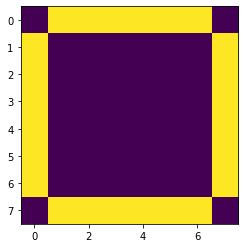

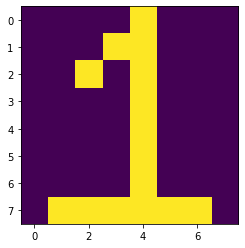

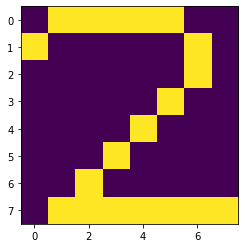

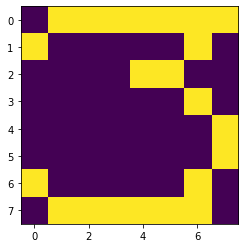

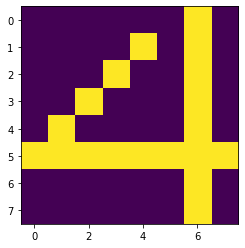

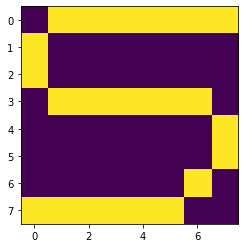

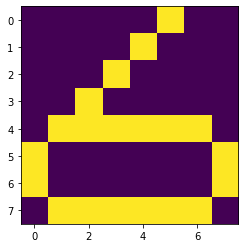

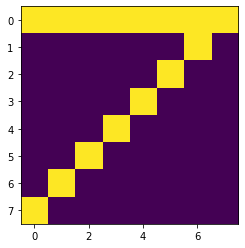

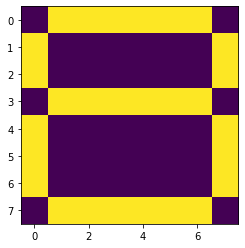

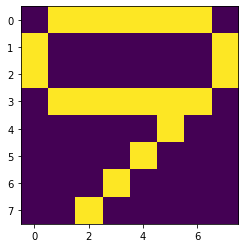

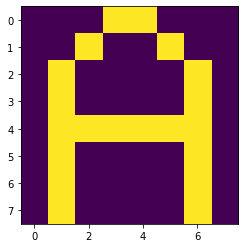

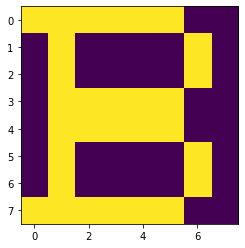

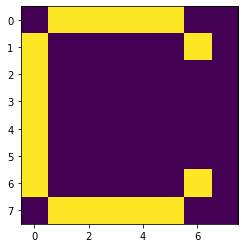

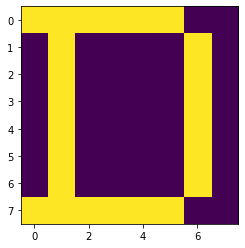

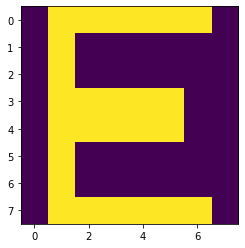

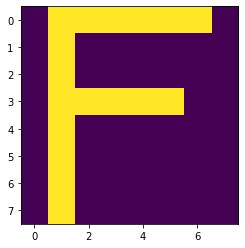

In [21]:
for i in range(16):
    plot.imshow(X[i])
    plot.show()

In [22]:
epochs = 1200
nn = NeuralNetwork(structure=[64, 16, 16, 4], activations=['sig', 'sig', 'sig'])

layer 0 : W = (16, 64) B = (16, 1)
layer 1 : W = (16, 16) B = (16, 1)
layer 2 : W = (4, 16) B = (4, 1)


In [23]:
loss = nn.learn(X, Y, epochs=epochs, learning_rate=0.05)

epoch 10 - loss = 1.003504408107192
epoch 20 - loss = 0.989061211435985
epoch 30 - loss = 0.9627866623353455
epoch 40 - loss = 0.9130107979285973
epoch 50 - loss = 0.8385241263595484
epoch 60 - loss = 0.7589989922638303
epoch 70 - loss = 0.6817005483481258
epoch 80 - loss = 0.6006755448043763
epoch 90 - loss = 0.5195386000073988
epoch 100 - loss = 0.4465993392873626
epoch 110 - loss = 0.38472694460638684
epoch 120 - loss = 0.3336978741557942
epoch 130 - loss = 0.2924105769604714
epoch 140 - loss = 0.2593308075573468
epoch 150 - loss = 0.2328592366364437
epoch 160 - loss = 0.21154107030832686
epoch 170 - loss = 0.1941706273929888
epoch 180 - loss = 0.17981444924291956
epoch 190 - loss = 0.16777631917972344
epoch 200 - loss = 0.1575433587420914
epoch 210 - loss = 0.14873674492701558
epoch 220 - loss = 0.14107379062842873
epoch 230 - loss = 0.13434068654698023
epoch 240 - loss = 0.12837337170860763
epoch 250 - loss = 0.12304415604204902
epoch 260 - loss = 0.11825230674515103
epoch 270 - l

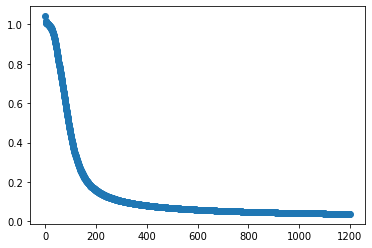

In [24]:
plt.scatter([i for i in range(0, epochs)], loss)
plt.show()

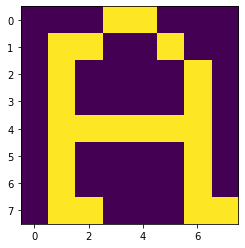

[[0.99809   ]
 [0.01600798]
 [0.98351324]
 [0.04083833]]
[[1.]
 [0.]
 [1.]
 [0.]]


In [25]:
xx = [
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 1, 1],
]

plot.imshow(xx) 
plot.show()

yy = [1, 0, 1, 0]
a = nn.predict(xx)
print(a)
print(np.around(a, 1))

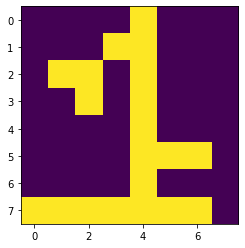

[[0.02970561]
 [0.01759955]
 [0.00820292]
 [0.99064665]]
[[0.]
 [0.]
 [0.]
 [1.]]


In [26]:
xx = [
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0],
]

plot.imshow(xx)
plot.show()

yy = [0, 0, 0, 1]
a = nn.predict(xx)
print(a)
print(np.around(a, 1))

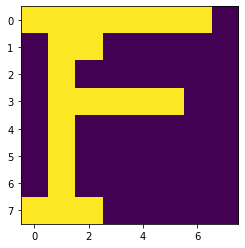

[[0.98313868]
 [0.98342004]
 [0.96794646]
 [0.97064362]]
[[1.]
 [1.]
 [1.]
 [1.]]


In [27]:
xx = [
    [1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
]

plot.imshow(xx)
plot.show()

yy = [1, 1, 1, 1]
a = nn.predict(xx)
print(a)
print(np.around(a, 1))

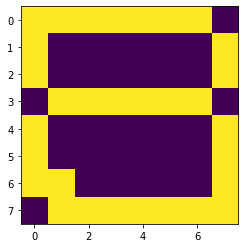

[[0.99179967]
 [0.0144877 ]
 [0.01357141]
 [0.01649683]]
[[1.]
 [0.]
 [0.]
 [0.]]


In [28]:
xx = [
    [1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 1, 1],
]

plot.imshow(xx)
plot.show()

yy = [1, 0, 0, 0]
a = nn.predict(xx)
print(a)
print(np.around(a, 1))

### Example 2: Cos(x)

In [12]:
x = np.random.uniform(low=-2 * np.pi, high=2 * np.pi, size=(10000,))
y = np.cos(x)
x = np.reshape(x, (-1, 1)).tolist()
y = np.reshape(y, (-1, 1)).tolist()

In [13]:
epochs = 50
nn = NeuralNetwork(structure=[1, 100, 100, 1], activations=['sig', 'sig', 'tanh'])

layer 0 : W = (100, 1) B = (100, 1)
layer 1 : W = (100, 100) B = (100, 1)
layer 2 : W = (1, 100) B = (1, 1)


In [14]:
loss = nn.learn(x, y, epochs=epochs, learning_rate=0.05)

epoch 10 - loss = 0.0800030734818578
epoch 20 - loss = 0.056175887761253714
epoch 30 - loss = 0.04766677765015809
epoch 40 - loss = 0.04189038705688323
epoch 50 - loss = 0.030691046767315884
final loss : 0.030691046767315884


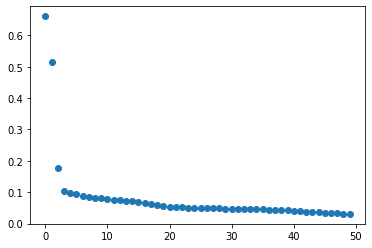

In [15]:
plt.scatter([i for i in range(0, epochs)], loss)
plt.show()

In [16]:
x = np.random.uniform(low=0, high=2 * np.pi, size=(1000,))
y = np.cos(x)
x = np.reshape(x, (-1, 1)).tolist()
y = np.reshape(y, (-1, 1)).tolist()
outs = []
for xx in x:
    outs.append(nn.predict(xx))

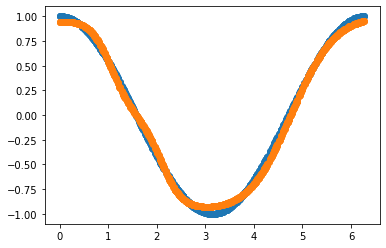

In [17]:
plt.scatter(x, y)
plt.scatter(x, outs)
plt.show()